In [1]:
from matplotlib import pyplot as plt
import cv2

In [2]:
cap = cv2.VideoCapture(0)

In [7]:
ret, frame = cap.read()

In [8]:
frame_tmp = frame.copy()

In [9]:
def drawDetectionBox(img,p1,p2, color=(0,255,0),thickness=13):
    x1,y1 = p1
    x2,y2 = p2
    x_length = abs(int((x2-x1)/5))
    y_length = abs(int((y2-y1)/5))
    
    cv2.rectangle(img,p1,p2,color, int(thickness/4))
    cv2.line(img,(x1,y1), (x1 + x_length , y1), color, thickness)    
    cv2.line(img,(x1,y1), (x1, y1 + y_length), color, thickness)
    cv2.line(img,(x2-x_length, y1), (x2 , y1), color, thickness)
    cv2.line(img,(x2,y1), (x2 , y1+ y_length), color, thickness)  
    cv2.line(img,(x1,y2-y_length), (x1, y2), color, thickness)  
    cv2.line(img,(x1,y2), (x1+ x_length, y2), color, thickness)  
    cv2.line(img,(x2-x_length,y2), (x2, y2), color, thickness)  
    cv2.line(img,(x2,y2), (x2, y2-y_length), color, thickness)

CPU times: user 113 ms, sys: 24.4 ms, total: 138 ms
Wall time: 105 ms


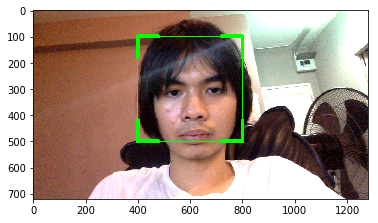

In [10]:
%%time
drawDetectionBox(frame_tmp,(400,100),(800,500))
plt.imshow(frame_tmp[...,[2,1,0]])

In [216]:
def transparentOverlay(src , overlay , pos=(0,0),scale = 1):
    """
    :param src: Input Color Background Image
    :param overlay: transparent Image (BGRA)
    :param pos:  position where the image to be blit.
    :param scale : scale factor of transparent image.
    :return: Resultant Image
    """
    overlay = cv2.resize(overlay,(0,0),fx=scale,fy=scale)
    h,w,_ = overlay.shape  # Size of foreground
    rows,cols,_ = src.shape  # Size of background Image
    y,x = pos[0],pos[1]    # Position of foreground/overlay image
    
    #loop over all pixels and apply the blending equation
    for i in range(h):
        for j in range(w):
            if x+i >= rows or y+j >= cols:
                continue
            alpha = float(overlay[i][j][3]/255.0) # read the alpha channel 
            src[x+i][y+j] = alpha*overlay[i][j][:3]+(1-alpha)*src[x+i][y+j]
    return src

In [217]:
overlay = cv2.imread('overlay.png',cv2.IMREAD_UNCHANGED)

In [218]:
overlay.shape

(320, 256, 4)

CPU times: user 773 ms, sys: 33.6 ms, total: 807 ms
Wall time: 731 ms


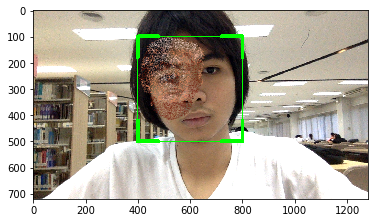

In [231]:
%%time
result = transparentOverlay(frame_tmp,overlay,(400,100),1)
plt.imshow(result[...,[2,1,0]])

In [220]:
overlay.shape

(320, 256, 4)